In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer

%matplotlib inline
import ipynb.fs.defs.functions as func

In [2]:
# register_matplotlib_converters()
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load the data and transform the format for easier manipulations

In [3]:
data = pd.read_csv('covtype.data', sep=",")
data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
data['class'] = data['Cover_Type'] - 1
data.drop(columns=['Cover_Type'], inplace=True)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4


## Some generic data exploratory analysis

In [5]:
# Top variables with missing values:
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()

top_missing = sorted(mv.items(), key=operator.itemgetter(1), reverse=True)
if any([nb_missing for nb_missing in mv.values()]):
    print(top_missing)
else:
    print('No missing values in the whole dataset!')

No missing values in the whole dataset!


In [6]:
# Very informative...
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,1.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
dtype: int64


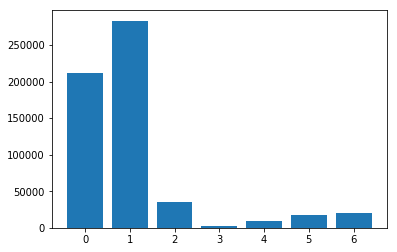

In [7]:
target_count = pd.value_counts(data['class'].values.flatten())
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)
plt.bar(target_count.index, target_count.values)
print(target_count)

## Preprocessing
As each preprocessing step has to be numerically analized and reasoned about, for each preprocessing technique we will evaluate the preprocessing technique on several classifiers and decide if we want to keep the change or not based on the performance gain.

The performance will be evaluated on several classifiers including knn, naive bayes, xgboost, etc. If there was a performance gain after applying that preprocessing step, we will include that preprocessing step in our pipeline.

In [8]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

In [9]:
def split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.flatten(), test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [10]:
def evaluate(df, split_dataset=split, knn=None, tree=None, rf=None, boost=None):
    def report(y_pred):
        return {
            'Accuracy': metrics.accuracy_score(y_test, y_pred),
#             'ROC AUC': metrics.roc_auc_score(y_test, y_pred),
#             'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred),
            'Sensitivity': metrics.classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        }
    
    X_train, X_test, y_train, y_test = split_dataset(df)
    res = {}
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    res['Naive Bayes'] = report(nb.predict(X_test))
    
    if knn is None:
        knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    res['KNN'] = report(knn.predict(X_test))
    
    if tree is None:
        tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)
    res['Decision Tree'] = report(tree.predict(X_test))

    if rf is None:
        rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
    rf.fit(X_train, y_train)
    res['Random Forest'] = report(rf.predict(X_test))
    
    D_train = xgb.DMatrix(X_train, label=y_train)
    D_test = xgb.DMatrix(X_test, label=y_test)
    if boost is None:
        boost = xgb.train({'eta': 0.3, 'max_depth': 5, 'objective': 'multi:softprob', 'num_class': len(target_count)}, D_train, 10)
    preds = boost.predict(D_test)
    res['xgboost'] = report(np.asarray([np.argmax(line) for line in preds]))
    
    return res

evaluate(data)

{'Naive Bayes': {'Accuracy': 0.45714384064622726,
  'Sensitivity': 0.16102870307247466},
 'KNN': {'Accuracy': 0.9656577014870571, 'Sensitivity': 0.9729424763158513},
 'Decision Tree': {'Accuracy': 0.9324800348815862,
  'Sensitivity': 0.9448741155175251},
 'Random Forest': {'Accuracy': 0.9528180649899027,
  'Sensitivity': 0.972413549918898},
 'xgboost': {'Accuracy': 0.7545036258490913,
  'Sensitivity': 0.8257833987634876}}

In [11]:
def show_progress(evaluations, labels, metric='Sensitivity'):
    methods = evaluations[0].keys()
    evaluations = [[results[metric] for method, results in evaluation.items()] for evaluation in evaluations]
    fig, ax = plt.subplots()
    ind = np.arange(len(evaluations[0]))
    width = 0.2
    
    p = [ax.bar(ind + i*width, height=evaluation, width=width, bottom=0) for i, evaluation in enumerate(evaluations)]
    
    ax.set_title(f'{metric} Scores')
    ax.set_xticks(ind + width / len(evaluations) * (len(evaluations) - 1))
    ax.set_xticklabels(methods)

    ax.legend(labels, loc='lower right', fancybox=True, shadow=True)
    ax.autoscale_view()

    plt.xticks(rotation=90)
    plt.show()

### 1. Standardization vs Normalization

In [12]:
standard = data.copy()
normal = data.copy()
for c in data.columns[0:10]:
    standard[c] = (data[c] - data[c].mean()) / data[c].std()
    normal[c]   = (data[c] - data[c].mean()) / (data[c].max() - data[c].min())
standard.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4


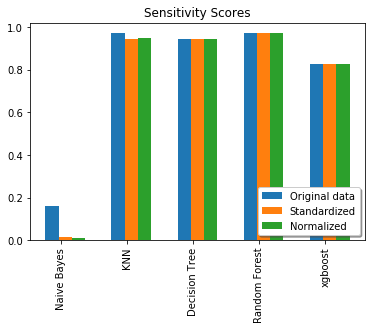

In [13]:
show_progress(evaluations=[evaluate(data), evaluate(standard), evaluate(normal)], 
              labels=['Original data', 'Standardized', 'Normalized'], 
              metric='Sensitivity')

* As we can see, the step improved the performance of the model a lot for Naive Bayes and KNN.
* The performance changes from data standardization to data normalization is not significant
* One performs better for Decision Tree, another for Random forest.
* So, we will keep data standardization as part of our pipeline

In [14]:
data = standard

### 2. Oversampling vs Undersampling

In [15]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.over_sampling import SMOTE, ADASYN

def oversampled_data_split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.3, random_state=42)
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

def oversampled_ADASYN_data_split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.3, random_state=42)
    X_train, y_train = ADASYN().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test


def undersampled_data_split(df, test_size=0.3):
    X = df.loc[:, ~df.columns.isin(['class'])]
    y = df.loc[:, df.columns.isin(['class'])]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.flatten(), test_size=0.3, random_state=42)
    X_train, y_train = RepeatedEditedNearestNeighbours().fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

Using TensorFlow backend.


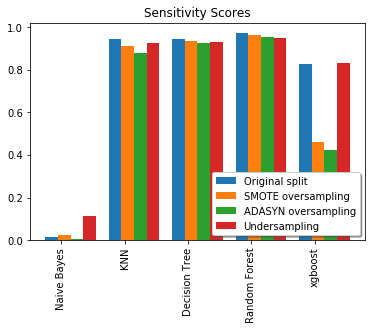

In [16]:
show_progress(evaluations=[evaluate(data), 
                           evaluate(data, split_dataset=oversampled_data_split), 
                           evaluate(data, split_dataset=oversampled_ADASYN_data_split), 
                           evaluate(data, split_dataset=undersampled_data_split),
                          ], 
              labels=['Original split', 'SMOTE oversampling', 'ADASYN oversampling', 'Undersampling'], 
              metric='Sensitivity')

* As we can see SMOTE oversampling performed the best among all the other methods
* So, we will include the SMOTE oversampling in our pipeline

### 3. Feature selection

In [17]:
def get_inter_class_important_column_names(df, correlation_threshold=0, plot_correlations=True):
    superclasses = list(dict.fromkeys([c.split('-')[0] for c in df.columns]))
    groups = {c: [] for c in superclasses}
    for c in df.columns:
        groups[c.split('-')[0]].append(c)
    
    important_columns = []
    for i, (group_name, columns) in enumerate(groups.items()):
        corr_matrix = df[columns].corr().abs()                                               # Calculate the correlation within group
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
        to_keep = list(set(columns) - set(to_drop))
        important_columns += to_keep
        
        # Plot the correlation
        if not plot_correlations or i == 0 or i == len(groups.values()) - 1 or len(columns) > 10:
            continue
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 30))
        axes[0].set_title(f'In-group correlation for {group_name}')
        sns.heatmap(corr_matrix, ax=axes[0], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        corr_matrix = df[to_keep].corr().abs()
        axes[1].set_title('Correlation between the kept variables')
        sns.heatmap(corr_matrix, ax=axes[1], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
        fig.tight_layout()
        plt.show()
    return important_columns


def get_intra_class_important_column_names(df, correlation_threshold=0, plot_correlations=False):
    columns = df.columns
    corr_matrix = df[columns].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    to_keep = list(set(columns) - set(to_drop) | set(['class']))
    return to_keep
    

importants = get_inter_class_important_column_names(data, correlation_threshold=0.4, plot_correlations=False)
importants = data[importants]
print(importants.shape)
importants.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,class
0,-1.297804,-0.935156,-1.482819,-0.053767,-0.796272,-1.180145,0.330743,0.439143,0.142960,3.246280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
1,-1.319234,-0.890479,-1.616361,-0.270188,-0.899196,-1.257105,0.293388,0.590898,0.221341,3.205501,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
2,-0.554906,-0.148836,-0.681562,-0.006719,0.318742,0.532212,0.816363,0.742653,-0.196691,3.126963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.622767,-0.005869,0.520322,-0.129044,1.227907,0.474492,0.965785,0.742653,-0.536343,3.194928,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,-1.301376,-0.988769,-1.616361,-0.547770,-0.813426,-1.256463,0.293388,0.540313,0.195214,3.165476,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4


In [18]:
def multiline_measure_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False, plot_legend=True):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    legend = []
    colors = {}
    for name, y in yvalues.items():
        [method, measure] = name.split('-')
        style = ':' if measure == 'Sensitivity' else '-'
        c = colors.get(method, None)
        p = ax.plot(xvalues, y, linestyle=style, c=c)
        colors[method] = p[-1].get_color()
        legend.append(name)
    
    if plot_legend:
        ax.legend(legend, loc='lower left', fancybox=True, shadow=True)    
    

In [19]:
def evaluate_threshold_performance(df, correlation_thresholds, get_importants=get_inter_class_important_column_names,
                                   title='Performance of different classifiers', xlabel='Correlation Threshold'):
    performance = {}

    correlation_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.97, 1.,]
    for threshold in correlation_thresholds:
        importants = get_importants(data, correlation_threshold=threshold, plot_correlations=False)
        importants = df[importants]

        res = evaluate(importants, split_dataset=oversampled_data_split)
        for method, measures in res.items():
            for measure, value in measures.items():
                if measure not in {'Accuracy', 'Sensitivity'}:
                    continue
                name = f'{method}-{measure}'
                if name not in performance:
                    performance[name] = []
                performance[name].append(value)

    plt.figure(figsize=(12, 6))
    plt.xticks(correlation_thresholds)
    multiline_measure_line_chart(plt.gca(), correlation_thresholds, performance, title=title, xlabel=xlabel, ylabel='')


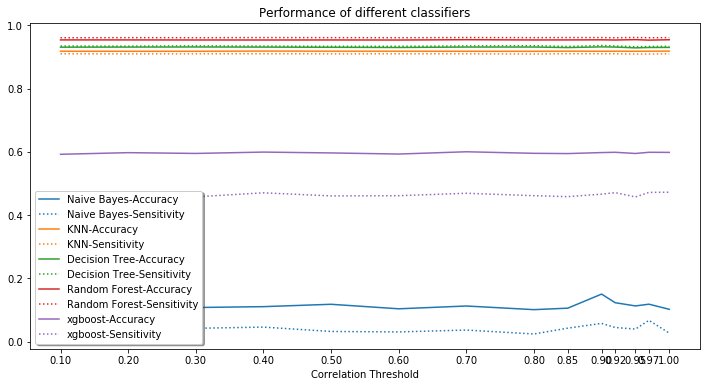

In [20]:
evaluate_threshold_performance(data, 
                               correlation_thresholds=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.97, 1.,], 
                               get_importants=get_inter_class_important_column_names)

* On average, the best performance is obtained at threshold close to 0.95

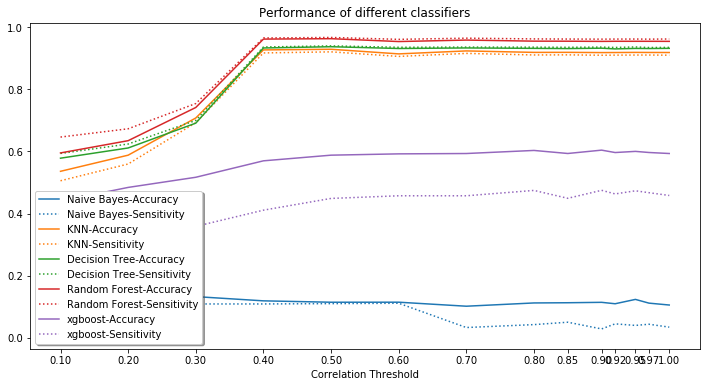

In [21]:
evaluate_threshold_performance(data, 
                               correlation_thresholds=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 0.97, 1.,], 
                               get_importants=get_intra_class_important_column_names)

* On average, the best performance is obtained at threshold close to 0.8

* Now that we know which are the best thresholds for those two methods lets compare them to each other

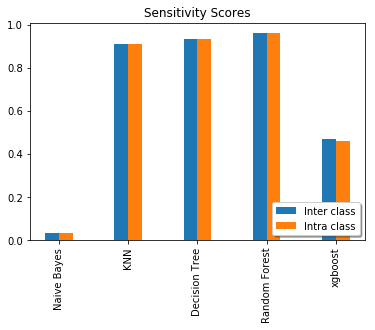

In [22]:
show_progress(
    evaluations=[
        evaluate(data[get_inter_class_important_column_names(data, correlation_threshold=0.95, plot_correlations=False)], split_dataset=oversampled_data_split), 
        evaluate(data[get_intra_class_important_column_names(data, correlation_threshold=0.8, plot_correlations=False)], split_dataset=oversampled_data_split), 
    ], 
    labels=['Inter class', 'Intra class'], 
    metric='Sensitivity')

* As we can see these two methods have very similar performance
* As in most of the cases Inter-class method outperforms slightly the intra-class ones, we will include selecting features based on the inter-class performance in our pipeline

## Feature analysis
As we don't know much about the variables and it's would be almost impossible to analyze the behaviour of all the 755 variables let's select some important ones and do exploratory analysis on them.

We will select the most important features based on the decision tree classifier and do some analysis on those.

In [23]:
import operator
def get_decision_importants(df, nb_importants=6):
    X_train, X_test, y_train, y_test = oversampled_data_split(df)
    tree = DecisionTreeClassifier(class_weight='balanced')
    tree.fit(X_train, y_train)
    col2importance = dict(zip(df.columns, tree.feature_importances_))
    best = sorted(col2importance.items(), key=operator.itemgetter(1), reverse=True)[:nb_importants]

    return [name for name, score in best]

importants = get_decision_importants(data, nb_importants=8)
importants = data[importants]

<Figure size 432x288 with 0 Axes>

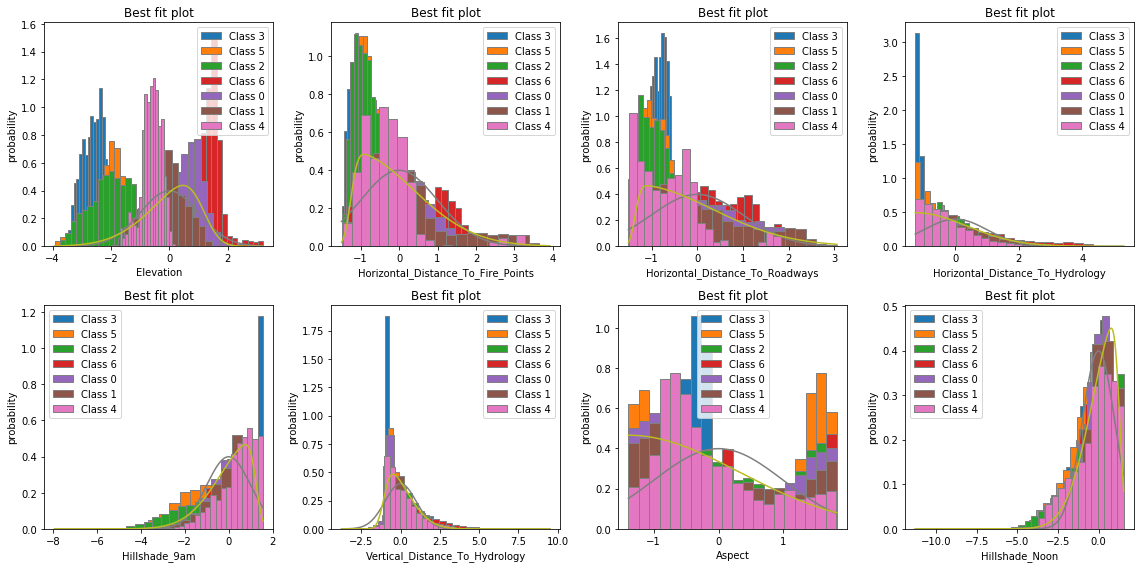

In [24]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
#     sigma, loc, scale = _stats.lognorm.fit(x_values)
#     distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
#     loc, scale = _stats.expon.fit(x_values)
#     distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
    a, loc, scale = _stats.skewnorm.fit(x_values)
    distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, labels: pd.Series, var: str):
    classes = labels.unique()[::-1]
    for c in classes:
        values = pd.Series([s for s, l in zip(series, labels) if l == c])
        values = values.sort_values().values
        n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey', label=f'Class {c}')
    values = series.sort_values().values
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit plot', var, 'probability', plot_legend=False)
    ax.legend()

columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns) - 1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), data['class'], columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

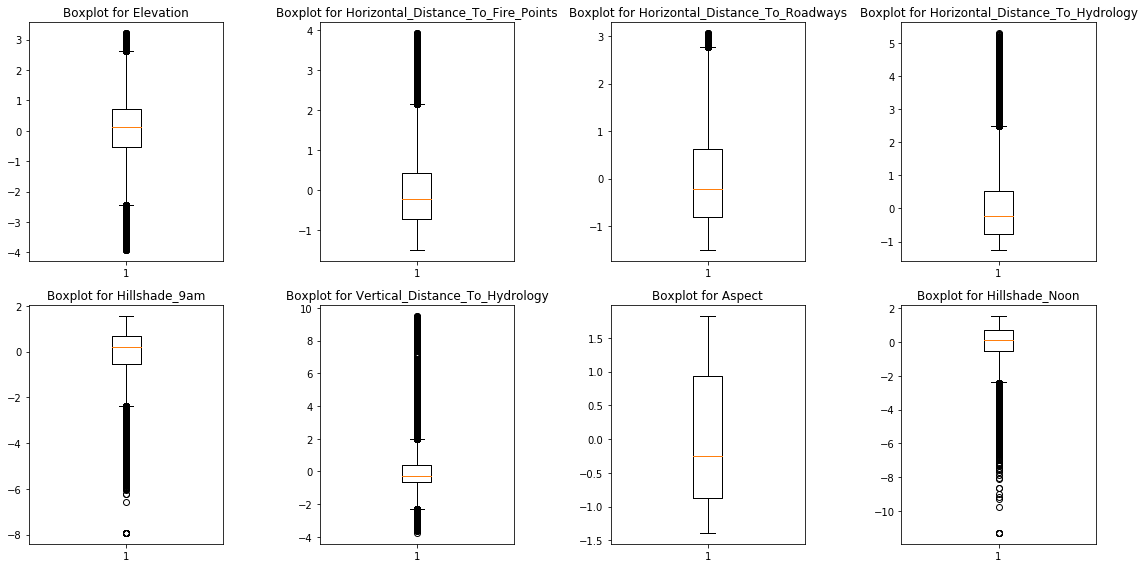

In [25]:
columns = importants.select_dtypes(include='number').columns
rows, cols = func.choose_grid(len(columns) - 1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Multi-Variate Analysis
##### Again, as the dataset is too large in terms of the number of columns, we will concentrate on the variables that are important based the previous findings

<Figure size 432x288 with 0 Axes>

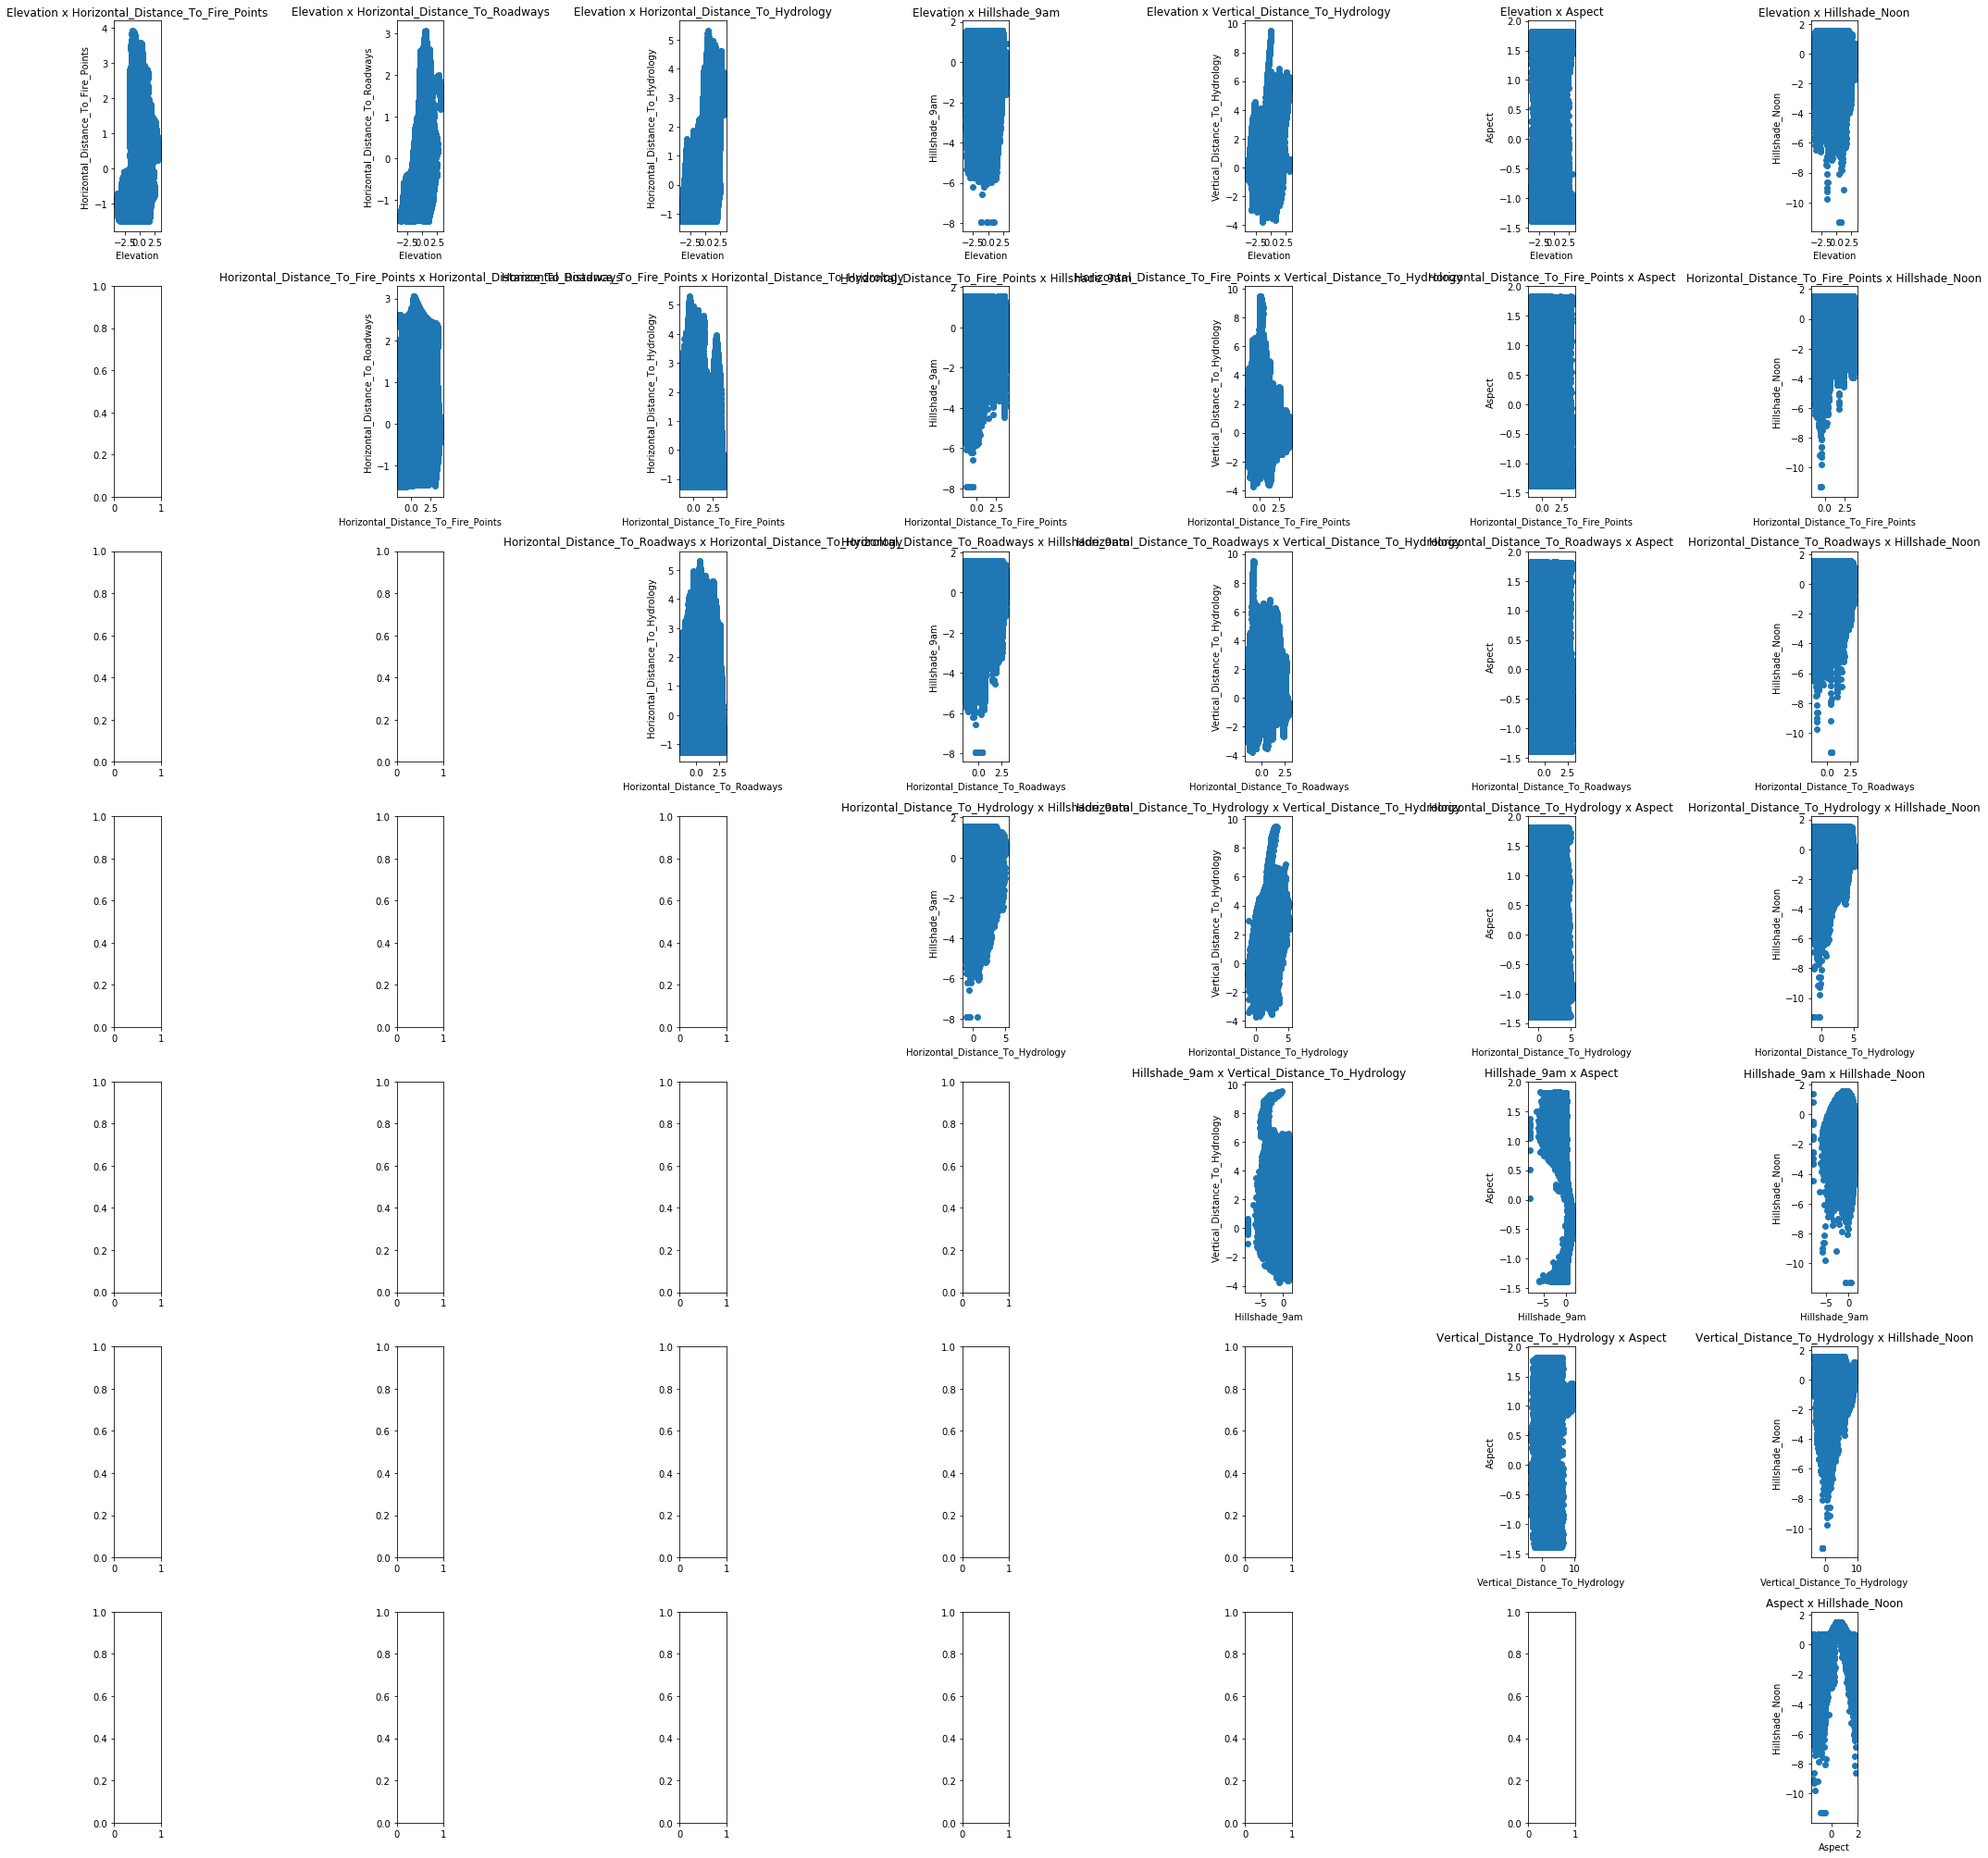

In [26]:
columns = importants.select_dtypes(include='number').columns

rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

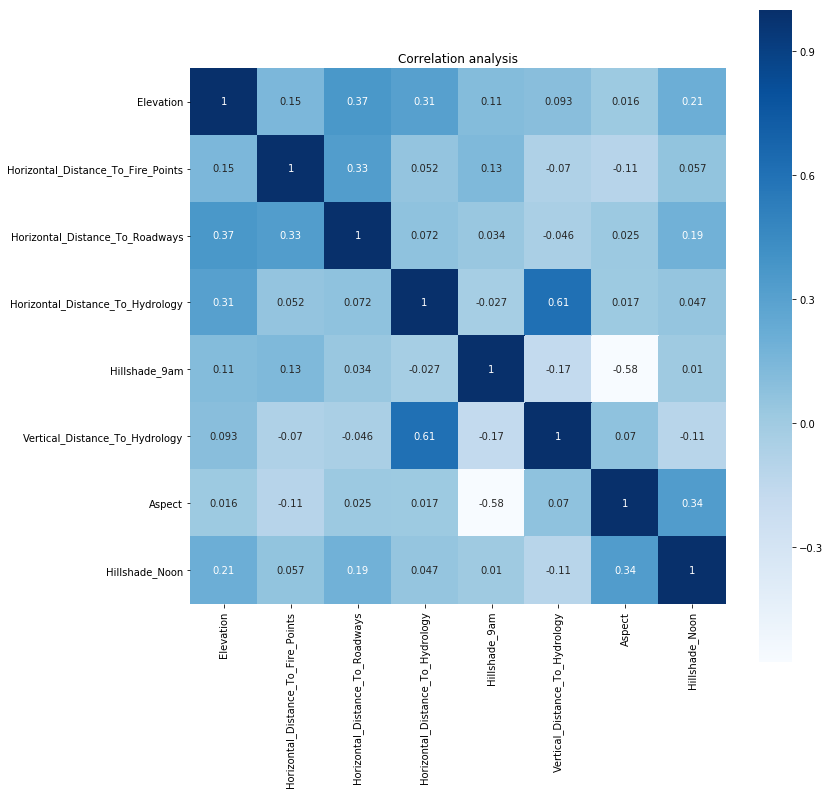

In [27]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = importants.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues', square=True)
plt.title('Correlation analysis')
plt.show()

## Classification

In [28]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight

In [29]:
X_train, X_test, y_train, y_test = oversampled_data_split(data)
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
print('Class weights:', class_weight)

Class weights: [1. 1. 1. 1. 1. 1. 1.]


### 1. Naive bayes

In [30]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
print('Sensitivity:', metrics.recall_score(y_test, y_pred))
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_mtx, annot=True, cmap='Blues', fmt='g')

              precision    recall  f1-score   support

           0       0.30      0.05      0.09     63556
           1       0.90      0.03      0.07     85078
           2       0.29      0.39      0.33     10638
           3       0.07      1.00      0.13       795
           4       0.03      0.72      0.05      2941
           5       0.16      0.08      0.10      5227
           6       0.11      0.95      0.20      6069

    accuracy                           0.11    174304
   macro avg       0.27      0.46      0.14    174304
weighted avg       0.58      0.11      0.10    174304

Accuracy: 0.11095557187442628


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### 2. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13]
dist = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']

performance = {}
for d in dist:
    performance[f'{d}-ROC AUC'], performance[f'{d}-Sensitivity'] = [], []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        performance[f'{d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#         performance[f'{d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
        performance[f'{d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
    acc = performance[f'{d}-Accuracy']
#     auc = performance[f'{d}-ROC AUC']
    sens = performance[f'{d}-Sensitivity']
    print(f'[d={d}] Best acc: {max(acc)}, with nvalues: {nvalues[np.argmax(acc)]}')
#     print(f'[d={d}] Best auc: {max(auc)}, with nvalues: {nvalues[np.argmax(auc)]}')
    print(f'[d={d}] Best sensitivity: {max(sens)}, with nvalues: {nvalues[np.argmax(sens)]}')
    print('---------------------------')

plt.figure()
plt.xticks(nvalues)
multiline_measure_line_chart(plt.gca(), nvalues, performance, title='KNN variants', xlabel='k', ylabel='')
plt.show()

## 3. Decision Tree

In [ ]:
min_samples_leaf = np.array(range(1, 200, 10)) / 1000.
print('Min samples leaf:', min_samples_leaf)
max_depths = [3, 5, 7, 10, 15]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
for k, f in enumerate(criteria):
    performance = {}
    for d in max_depths:
        performance[f'd={d}-ROC AUC'], performance[f'd={d}-Sensitivity'] = [], []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, class_weight='balanced')
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#             performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
            performance[f'd={d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
        acc = performance[f'd={d}-Accuracy']
#         auc = performance[f'd={d}-ROC AUC']
        sens = performance[f'd={d}-Sensitivity']
            
        print(f'[criterion={f}, d={d}] Best acc: {max(acc)}, with min_samples_leaf: {min_samples_leaf[np.argmax(acc)]}')
#         print(f'[criterion={f}, d={d}] Best auc: {max(auc)}, with min_samples_leaf: {min_samples_leaf[np.argmax(auc)]}')
        print(f'[criterion={f}, d={d}] Best sensitivity: {max(sens)}, with min_samples_leaf: {min_samples_leaf[np.argmax(sens)]}')
        print('---------------------------')
    multiline_measure_line_chart(axs[0, k], min_samples_leaf, performance, title=f'{f} variants', xlabel='min_samples_leaf', ylabel='', percentage=True)
    
plt.show()

## 4. Random Forest

In [ ]:
n_estimators = [5, 10, 25, 50, 75, 100, 150, 200]
max_depths = [3, 5, 7, 10, 15]
max_features = ['sqrt', 'log2', None]

plt.figure()
fig, axs = plt.subplots(1, len(max_features), figsize=(16, 6), squeeze=False)
for k, f in enumerate(max_features):
    performance = {}

    for d in max_depths:
        performance[f'd={d}-ROC AUC'], performance[f'd={d}-Sensitivity'] = [], []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, class_weight='balanced')
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#             performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
            performance[f'd={d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
        acc = performance[f'd={d}-Accuracy']
#         auc = performance[f'd={d}-ROC AUC']
        sens = performance[f'd={d}-Sensitivity']
            
        print(f'[max_features={k}, d={d}] Best acc: {max(acc)}, with n_estimators: {n_estimators[np.argmax(acc)]}')
#         print(f'[max_features={f}, d={d}] Best auc: {max(auc)}, with n_estimators: {n_estimators[np.argmax(auc)]}')
        print(f'[max_features={f}, d={d}] Best sensitivity: {max(sens)}, with n_estimators: {n_estimators[np.argmax(sens)]}')
        print('---------------------------')
    multiline_measure_line_chart(axs[0, k], n_estimators, performance, title=f'{f} variants', xlabel='nnumber of estimators', ylabel='', percentage=True)
    
plt.show()

## 5. xgboost

In [ ]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
nb_steps = list(range(5, 51, 5))
max_depths = [3, 5, 7, 10, 15]

performance = {}
for d in max_depths:
    performance[f'd={d}-ROC AUC'], performance[f'd={d}-Sensitivity'] = [], []
    for n in nb_steps:
        param = {
            'eta': 0.3, 
            'max_depth': d,  
            'objective': 'multi:softprob',  
            'num_class': len(target_count)
        } 
        model = xgb.train(param, D_train, n)
        preds = model.predict(D_test)
        y_pred = np.asarray([np.argmax(line) for line in preds])

        performance[f'd={d}-Accuracy'].append(metrics.accuracy_score(y_test, y_pred))
#         performance[f'd={d}-ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred))
        performance[f'd={d}-Sensitivity'].append(metrics.recall_score(y_test, y_pred))
    acc = performance[f'd={d}-Accuracy']
#     auc = performance[f'd={d}-ROC AUC']
    sens = performance[f'd={d}-Sensitivity']
    print(f'[d={d}] Best acc: {max(acc)}, with nvalues: {nvalues[np.argmax(acc)]}')
#     print(f'[d={d}] Best auc: {max(auc)}, with nb_steps: {nb_steps[np.argmax(auc)]}')
    print(f'[d={d}] Best sensitivity: {max(sens)}, with nb_steps: {nb_steps[np.argmax(sens)]}')
    print('---------------------------')

plt.figure()
plt.xticks(nb_steps)
multiline_measure_line_chart(plt.gca(), nb_steps, performance, title='xgboost variants', xlabel='nb_steps', ylabel='', percentage=True)
plt.show()

## Comparison between the best models

In [ ]:
from pprint import pprint

param = {
    'eta': 0.3, 
    'max_depth': 5,  
    'objective': 'multi:softprob',  
    'num_class': len(target_count),
}

boost = xgb.train(param, D_train, 30)
res = evaluate(data, split_dataset=oversampled_data_split, 
         knn=KNeighborsClassifier(n_neighbors=1, metric='manhattan'), 
         tree=DecisionTreeClassifier(min_samples_leaf=0.001, max_depth=7, criterion='entropy', class_weight='balanced'), 
         rf=RandomForestClassifier(n_estimators=50, max_depth=15, max_features='log2', class_weight='balanced'), 
         boost=boost)

pprint(res)
show_progress(
    evaluations=[res], 
    labels=['Best models'], 
    metric='ROC AUC'
)

In [ ]:
show_progress(
    evaluations=[res], 
    labels=['Best models'], 
    metric='Sensitivity'
)

* As we can see, the KNN model with n_neighbors=1, metric='manhattan' has the best performance in terms of the AUC
* In terms of the Accuracy and sensitivity it has relatively the same performance with the Random Forest and xgboost

## Association Rules

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data.columns

In [ ]:
# pd.cut
selected_columns = get_inter_class_important_column_names(data, correlation_threshold=0.1, plot_correlations=False)
selected_columns = list(set(selected_columns + ['class']))

newdf = data[selected_columns].copy()
for col in newdf:
    if col not in ['class']: 
        newdf[col] = pd.cut(newdf[col],3,labels=['0','1','2'])
newdf.head(5)

In [ ]:
dummylist = []
for att in newdf:
    if att in ['class'] or att.startswith('y'): newdf[att] = newdf[att].astype('category')
    dummylist.append(pd.get_dummies(newdf[[att]]))
dummified_df = pd.concat(dummylist, axis=1)
dummified_df.head(5)

In [ ]:
frequent_itemsets = apriori(dummified_df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[(rules['antecedent_len']>=3)]

## Clustering

In [ ]:
from sklearn import datasets, metrics, cluster, mixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
errors = {'Sum of squares': []}
ks = list(range(1, 33))
for k in ks:
    X = data.loc[:, ~data.columns.isin(['class'])]
    kmeans_model = cluster.KMeans(n_clusters=k, random_state=1).fit(X)
    errors['Sum of squares'].append(kmeans_model.inertia_)

plt.figure(figsize=(12, 6))
plt.xticks(ks)
func.multiple_line_chart(plt.gca(), ks, errors, 'K means', 'k', 'Sum of squares error', plot_legend=False)

* According to the elbow method the best number of clusters is 3 or 4

In [ ]:
data.head()

In [ ]:
algorithms = {'auto', 'ball_tree', 'kd_tree', 'brute'}
leaf_sizes = list(range(2, 50, 2))

performance = {}
for algo in algorithms:
    performance[algo] = []
    for l in leaf_sizes:
        X = data.loc[:, ~data.columns.isin(['class'])]
        db = DBSCAN(eps=0.5, min_samples=2, algorithm=algo, leaf_size=l)
        labels = db.fit_predict(X)
        performance[algo].append(metrics.silhouette_score(X, labels))

plt.figure(figsize=(12, 6))
plt.xticks(min_samples)
func.multiple_line_chart(plt.gca(), min_samples, performance, 'DBSCAN', 'leaf size', 'Silhouette score', plot_legend=True)
plt.show()